In [18]:
## PICRUSt2 data visualisations, based on PICRUSt2 run from 17 September


# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load data
data_marker_nsti = pd.read_csv('~/PICRUSt2_test/picrust2_out_pipeline_lasse/marker_predicted_and_nsti.tsv', sep='\t', index_col=0)
data_ec_predicted = pd.read_csv('~/PICRUSt2_test/picrust2_out_pipeline_lasse/EC_predicted.tsv', sep='\t', index_col=0)
data_weighted_nsti = pd.read_csv('~/PICRUSt2_test/picrust2_out_pipeline_lasse/EC_metagenome_out/weighted_nsti.tsv', sep='\t', index_col=0)
data_pred_metagenome_unstrat = pd.read_csv('~/PICRUSt2_test/picrust2_out_pipeline_lasse/EC_metagenome_out/pred_metagenome_unstrat.tsv', sep='\t', index_col=0)
data_path_abun_unstrat = pd.read_csv('~/PICRUSt2_test/picrust2_out_pipeline_lasse/pathways_out/path_abun_unstrat.tsv', sep='\t', index_col=0)

# NSTI filter (keep only relatively closely related reference genomes)
data_marker_nsti_filtered = data_marker_nsti[data_marker_nsti['metadata_NSTI'] <= 0.2]


Using ECs found in table: ['EC:6.2.1.1', 'EC:2.7.2.1', 'EC:2.3.1.8', 'EC:2.3.1.101', 'EC:3.5.4.27', 'EC:1.12.98.2', 'EC:1.5.98.1', 'EC:1.5.98.2', 'EC:2.8.4.1', 'EC:1.8.98.1', 'EC:2.3.1.169', 'EC:2.1.1.247', 'EC:2.1.1.248', 'EC:2.1.1.249', 'EC:2.1.1.250', 'EC:2.1.1.246', 'EC:2.1.1.90']
Missing ECs: {'EC:1.8.98.4', 'EC:1.8.98.6', 'EC:1.8.7.3', 'EC:1.2.7.12', 'EC:1.8.98.5', 'EC:2.1.1.377', 'EC:7.2.1.4'}
Number of ASVs with at least 10 methanogenesis-related EC families: 57


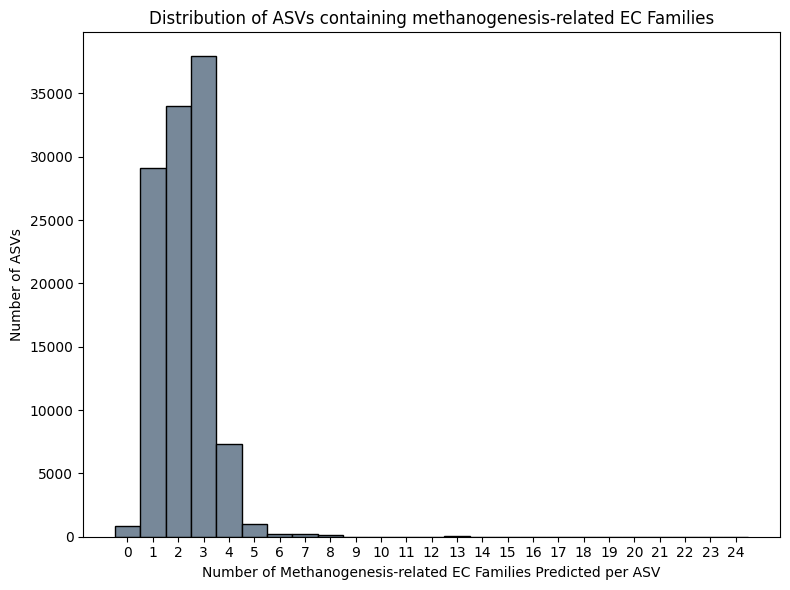

In [ ]:
# Histogram with distribution of ASVs containing predicted EC families involved in methanogenesis

# EC families in M00567, M00357, M00356, and M00563
ec_list = ["EC:6.2.1.1", "EC:2.7.2.1", "EC:2.3.1.8", "EC:1.2.7.12", "EC:2.3.1.101", "EC:3.5.4.27", "EC:1.12.98.2", "EC:1.5.98.1", "EC:1.5.98.2", "EC:7.2.1.4", "EC:2.8.4.1", "EC:1.8.7.3", "EC:1.8.98.1", "EC:1.8.98.5", "EC:1.8.98.4", "EC:1.8.98.6", "EC:2.3.1.169", "EC:2.1.1.247", "EC:2.1.1.248", "EC:2.1.1.249", "EC:2.1.1.250", "EC:2.1.1.246", "EC:2.1.1.377", "EC:2.1.1.90"]

ec_present = [ec for ec in ec_list if ec in data_ec_predicted.columns]

print("Using ECs found in table:", ec_present)
print("Missing ECs:", set(ec_list) - set(ec_present))

counts_ecs = (df_ec > 0).sum(axis=1)
n_asvs = (counts_ecs >= 10).sum()
print(f"Number of ASVs with at least 10 methanogenesis-related EC families: {n_asvs}")

df_ec = data_ec_predicted[ec_present]

counts_ecs = (df_ec > 0).sum(axis=1)

plt.figure(figsize=(8,6))
plt.hist(counts_ecs, bins=range(0, len(ec_list)+2), align='left', color='lightslategrey', edgecolor='black')
plt.xticks(range(0, len(ec_list)+1))
plt.xlabel('Number of Methanogenesis-related EC Families Predicted per ASV')
plt.ylabel('Number of ASVs')
plt.title('Distribution of ASVs containing methanogenesis-related EC Families')
plt.tight_layout()
plt.savefig("images/asv_ec_counts_histogram.png", dpi=300)
plt.show()

Number of ASVs with NSTI > 5: 51


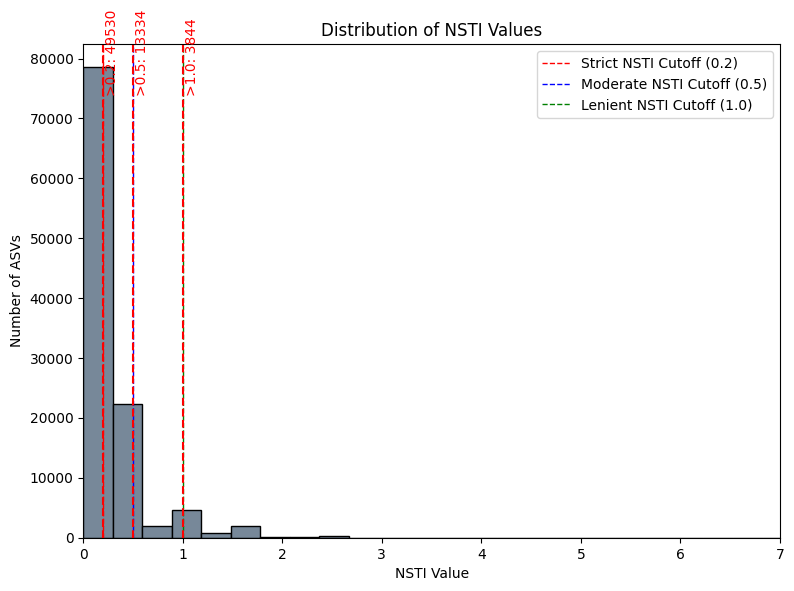

<Figure size 640x480 with 0 Axes>

In [16]:
# Histogram with distribution of NSTI values

nsti = data_marker_nsti["metadata_NSTI"].dropna()
cutoffs = [0.2, 0.5, 1.0]


plt.figure(figsize=(8,6))
plt.hist(nsti, bins=100, color='lightslategrey', edgecolor='black')
plt.xlabel('NSTI Value')
plt.ylabel('Number of ASVs')
plt.title('Distribution of NSTI Values')

plt.axvline(0.2, color='red', linestyle='--', linewidth=1, label='Strict NSTI Cutoff (0.2)')
plt.axvline(0.5, color='blue', linestyle='--', linewidth=1, label='Moderate NSTI Cutoff (0.5)')
plt.axvline(1.0, color='green', linestyle='--', linewidth=1, label='Lenient NSTI Cutoff (1.0)')

plt.legend()
plt.tight_layout()
plt.savefig("images/nsti_distribution_histogram.png", dpi=300)


n_above_5 = (nsti > 5).sum()
print(f"Number of ASVs with NSTI > 5: {n_above_5}")

for c in cutoffs:
    n_above = (nsti > c).sum()
    plt.axvline(c, color="red", linestyle="--")
    plt.text(c+0.02, plt.ylim()[1]*0.9, f">{c}: {n_above}", rotation=90, color="red")

plt.tight_layout()
plt.xlim(0, 7)
plt.show()
plt.savefig("images/nsti_distribution_histogram_cutoffs.png", dpi=300)



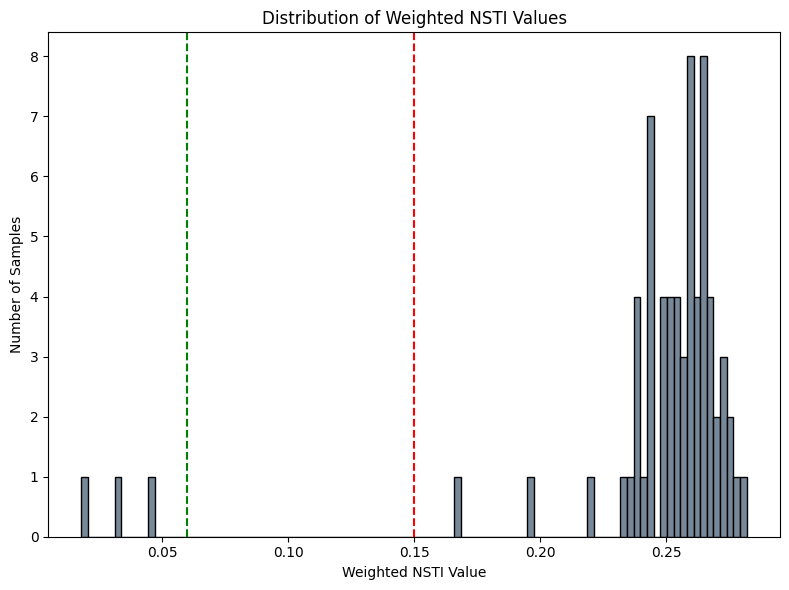

<Figure size 640x480 with 0 Axes>

In [ ]:
# Histogram with distribution of weighted NSTI values

weighted_nsti = data_weighted_nsti["weighted_NSTI"].dropna()

plt.figure(figsize=(8,6))
plt.hist(weighted_nsti, bins=100, color='lightslategrey', edgecolor='black')
plt.xlabel('Weighted NSTI Value')
plt.ylabel('Number of Samples')
plt.title('Distribution of Weighted NSTI Values')
plt.tight_layout()
for cutoff, color in [(0.06, "green"), (0.15, "red")]:
    plt.axvline(cutoff, color=color, linestyle="--")
plt.show()

plt.savefig("images/weighted_nsti_distribution_histogram.png", dpi=300)


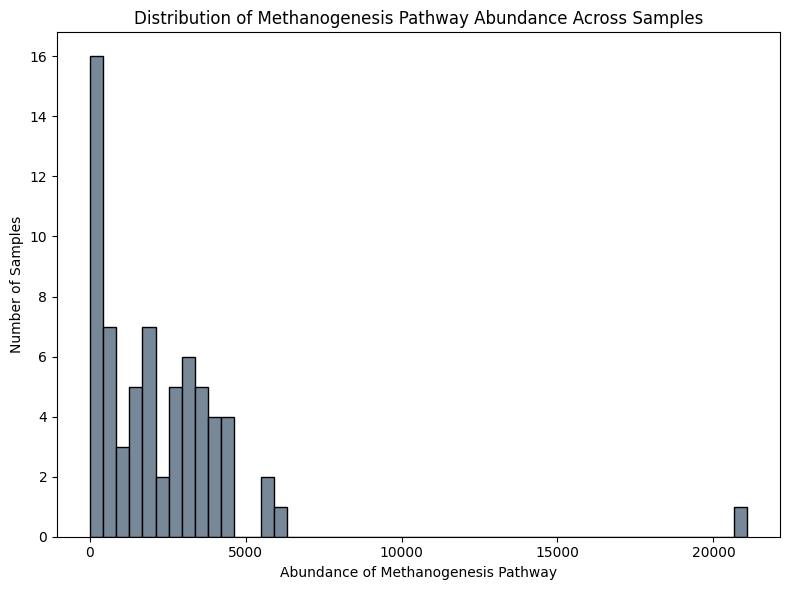

In [21]:
# Pathway abundance for methanogenesis across samples

methano_abundance = data_path_abun_unstrat.loc["METHANOGENESIS-PWY"]

plt.figure(figsize=(8,6))
plt.hist(methano_abundance, bins=50, color='lightslategrey', edgecolor='black')
plt.xlabel('Abundance of Methanogenesis Pathway')
plt.ylabel('Number of Samples')
plt.title('Distribution of Methanogenesis Pathway Abundance Across Samples')
plt.tight_layout()
plt.savefig("images/methanogenesis_pathway_abundance_histogram.png", dpi=300)
plt.show()

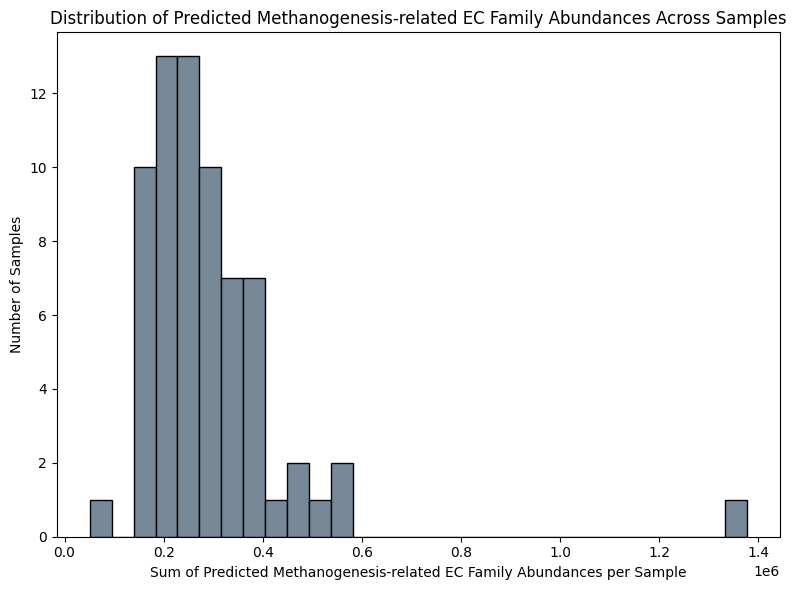

<Figure size 640x480 with 0 Axes>

In [17]:
# Distribution of predicted methanogenesis-related EC family abundance across samples

methano_sum = data_pred_metagenome_unstrat.loc[ec_present].sum(axis=0)

plt.figure(figsize=(8, 6))
plt.hist(methano_sum, bins=30, color='lightslategrey', edgecolor='black')
plt.xlabel('Sum of Predicted Methanogenesis-related EC Family Abundances per Sample')
plt.ylabel('Number of Samples')
plt.title('Distribution of Predicted Methanogenesis-related EC Family Abundances Across Samples')
plt.tight_layout()
plt.show()
plt.savefig("images/methanogenesis_ec_abundance_distribution.png", dpi=300)